# Lesson 5: Statistical analysis of time series

In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime , numpy as np, os
import matplotlib.pyplot as plt

In [2]:
def get_data(symbols, dates):
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("./data/{}.csv".format(symbol), 
                              index_col="Date", 
                              parse_dates=True, 
                              usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df1 = df1.join(df_temp)
        
        if symbol == 'SPY':
            df1  = df1.dropna(subset=["SPY"])
    return df1

def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title)
#     ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    return

def plot_selected(df, columns, start_index, end_index):
    tdf = df.loc[start_index:end_index, columns]
    plot_data(tdf,
             title="Selected Stocks")
    return

def normalize_data(df):
    df = df/df.iloc[0]
    return df



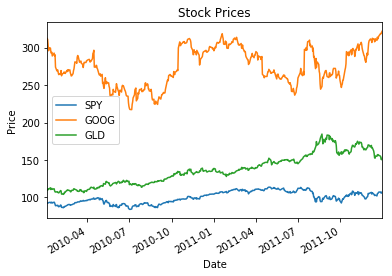

In [3]:
symbols = ['SPY', 'GOOG', 'GLD']
dates = pd.date_range("2010-01-01", "2012-12-31")
df = get_data(symbols, dates)
plot_data(df)

### Global Statistics

* `df.mean()`, `df.median()`, `df.std()`

In [4]:
df.mean()

SPY      99.924838
GOOG    275.118105
GLD     136.627837
dtype: float64

In [5]:
df.median()

SPY      99.232548
GOOG    272.413925
GLD     134.535004
dtype: float64

In [6]:
df.std()

SPY      7.917280
GOOG    24.732758
GLD     20.541676
dtype: float64

### Rolling Statistics

* rolling statistics important argument of TA
* __Bollinger bands__ are drawn $2*rolling\_std$ to identify buy and sell signals

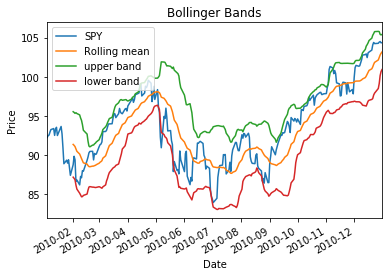

In [7]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

# def test_run():
# Read data
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()
    

* __Daily Returns__ is $curr\_day\_price/prev\_day\_price - 1$

In [8]:
def compute_daily_returns(df):
    ret = df/df.shift(1)-1
    return ret.fillna(0)


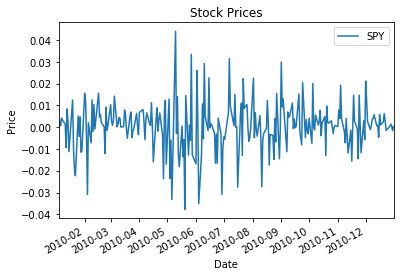

In [9]:
plot_data(compute_daily_returns(df))

# Lesson 6: Incomplete Data

### Reality of stock data

* Data is an amalgamation from multiple sources
* Not all stocks trade at all time
* Gaps in data are common

### Why data goes missing

* Companies who trade once in a while generate gaps
* Also companies when acquired by a new company etc also begin or end abruptly

### What to do?

* Fill forward from the latest data in the entire gap
* At the beginning of stock, you can fill backward in time
* `fillna(method=)` can be used to fill;`method=ffill` for forward, `method=bfill` for backward
* in the `fillna` function, argument `inplace` can be set to true to modify inplace

# Lesson 7: Histograms and Scatter plots

__Histogram of daily retuns__ looks like a bell curve i.e., gaussian distribution